In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [61]:
# Ex 1
# Fit a model with 2 features (multiple linear regression)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [2, 1], [3, 1]])
y = np.dot(X, np.array([1, 2])) + 3
# y = t0 + t1 * x1 + t2 * x2 (3 + 1 * x1 + 2 * x2)
reg = LinearRegression().fit(X, y)

In [62]:
# create a set of features linearly spaced + predict y for each combination
coefs = reg.coef_
intercept = reg.intercept_
xs = np.tile(np.linspace(0, 4, 30), (30,1))
ys = np.tile(np.linspace(0, 4, 30), (30,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept

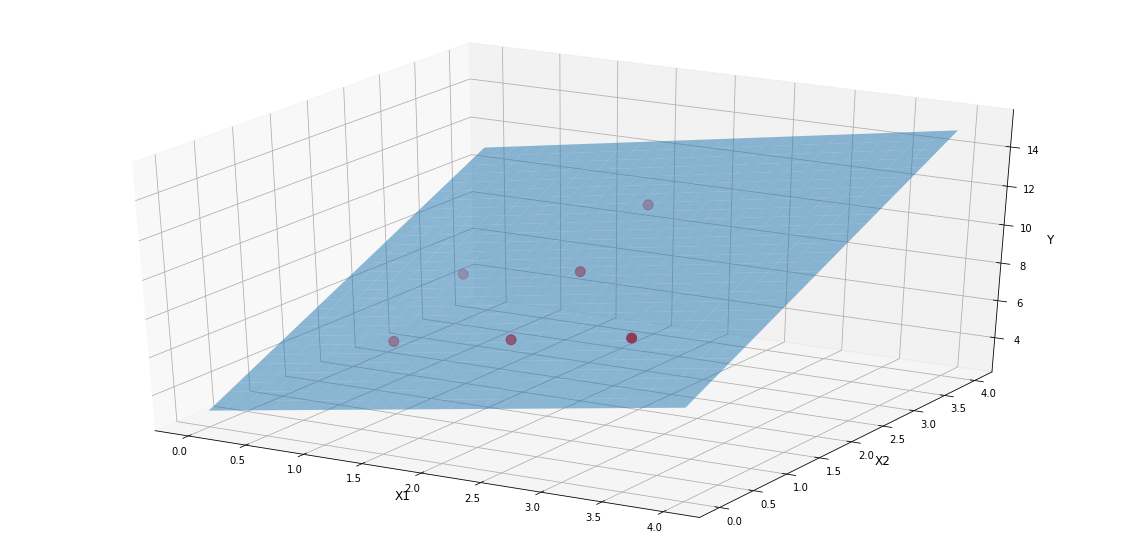

In [63]:
# plot results
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, s=100, color="red")
ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_zlabel('Y', fontsize=12)
plt.show()

Coefficients: 
 [938.23786125]


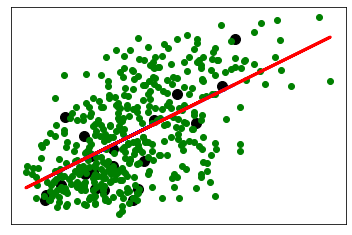

In [23]:
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black', s=100)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.scatter(diabetes_X_train, diabetes_y_train, color='green')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [106]:
# Load data
df = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [118]:
# train a linear regression model using all data. 
# warning: in practice, you want to split the training set into a train and test set and 
# fit a regressor on the train and then validate the fit using the test set
df = pd.read_csv('train.csv', header=0)
df = df[df['LotArea'] < 20000]
X = df['LotArea'].values.reshape(-1, 1)
y = df['SalePrice']
reg = LinearRegression().fit(X, y)

In [119]:
# predict the Sale price using the model from the previous cell for 100 LotArea values between the min and max LotArea in the training set.
# warning: linear regression is not always great at extrapolation! 
X_pred = np.linspace(df['LotArea'].min(), df['LotArea'].max(), 100).reshape(-1, 1)
y_pred = reg.predict(X_pred)

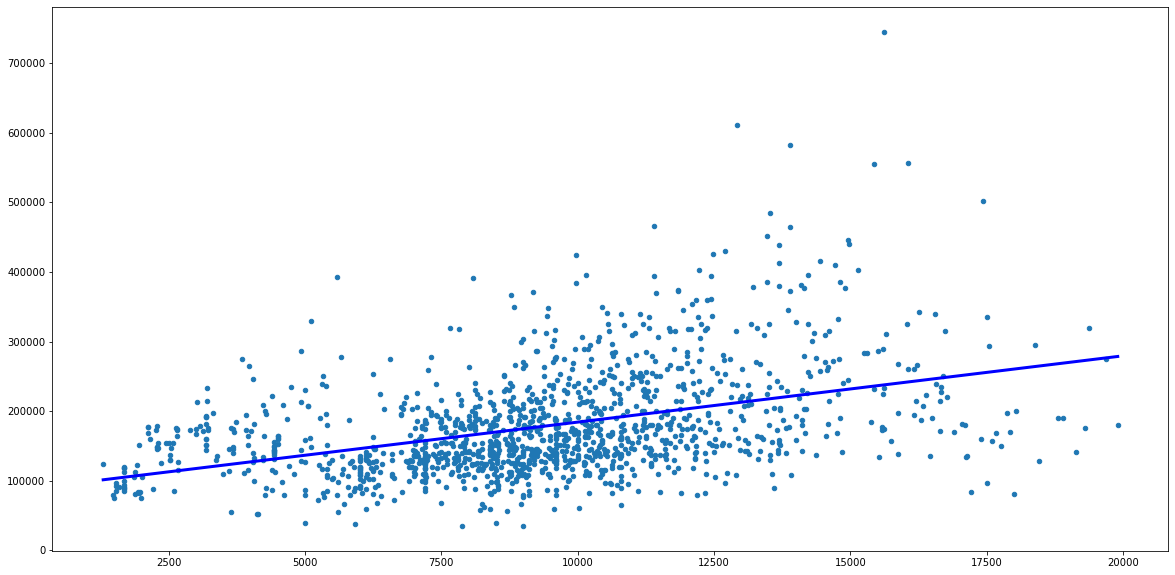

In [120]:
# plot the training data + model preditions
fig2 = plt.figure(figsize=(20,10))
plt.scatter(X, y, s=20)
plt.plot(X_pred, y_pred, color="blue", linewidth=3)
plt.show()

In [108]:
df = pd.read_csv('train.csv', header=0)
df = df.fillna(-1)

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

reg = Ridge(alpha=0.2)
X = df[['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']].values
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [112]:
reg.score(X_test, y_test)

0.6705981563690941

In [90]:
# only for 1D
fig3 = plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, s=20, color="blue")
plt.plot(X_train, y_train_pred, color="blue", linewidth=3)
plt.scatter(X_test, y_test, s=30, color="green")
plt.plot(X_test, y_pred, color="green", linewidth=3)
plt.show()

ValueError: x and y must be the same size